![MLU Logo](https://drive.corp.amazon.com/view/bwernes@/MLU_Logo.png?download=true)

# Reinforcement Learning
# Assignment 1
## Introduction
Welcome to the first RL assignment.  This week, we'll dive in to Dynamic Programming (DP) and Markov Decision Process (MDP). See how it is implemented.
A classical Gambler's problem will be used to implement these solutions. 

## Resources
I've always found experience the best teacher, so I advocate just diving in and trying to implement things.  However, it is always good to have other sources to reference, so every week I'll place links to things that I think are helpful to learn the material.
* [Chapters 1 and 4 of this book](http://incompleteideas.net/book/bookdraft2018jan1.pdf) about introduction to Reinforcement Learning and Dynamic Programing is nice.

In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
if "../" not in sys.path:
  sys.path.append("../") 

### The Gambler’s Problem

A gambler has the opportunity to make bets on the outcomes of a sequence of coin flips. If the coin comes up heads, he wins as many dollars as he has staked on that flip; if it is tails, he loses his stake.

The game ends when the gambler wins by reaching his goal of $100, or loses by running out of money.
On each flip, the gambler must decide what portion of his capital to stake, in integer
numbers of dollars. 

This problem can be formulated as an undiscounted, episodic, finite Markov Decision process (MDP).

The state is the gambler’s capital, s ∈ {1, 2, . . . , 99}.
The actions are stakes, a ∈ {0, 1, . . . , min(s, 100 − s)}. 

The reward is zero on all transitions except those on which the gambler reaches his goal, when it is +1.

The state-value function then gives the probability of winning from each state. 

A policy is a mapping from levels of capital to stakes. The optimal policy maximizes the probability of reaching the goal. Let p_h denote the probability of the coin coming up heads. 

If p_h is known, then the entire problem is known and it can be solved, for instance, by value iteration.


#### Bellman Equation
For this exercice, consider the core of the Bellman equation: 

+ The expected value of your action is the sum of immediate rewards and the value of the next state.

Consider the sum of imediate rewards and the discounted value for the next state for both probabilities:
+ heads **(winning: p(h))** and tails **(losing: (1 - p(h))**.


Like policy evaluation, value
iteration formally requires an infinite number of iterations to converge exactly to v*. In
practice, we stop once the value function changes by only a small amount in a sweep.
The box below shows a complete algorithm with this kind of termination condition.
<img src="../images/value_iteration_algorithm.png">

### Question 1

Take the algorithm above and create a function to implement value iteration for the gambler’s problem and solve it for **p_h** = 0.40, with a termination condition **theta** = 0.0001. As it is an undiscounted MDP, consider a **discount_factor** = 1.

The function must return the resulting expected value function.

In [13]:
def one_step_lookahead(p_h, discount_factor, s, V, rewards):
    """
    Helper function to calculate the value for all action in a given state.
        
    Args:
        s: The gambler’s capital. Integer.
        V: The vector that contains values at each state. 
        rewards: The reward vector.
                        
    Returns:
        A vector containing the expected value of each action. 
        Its length equals to the number of actions.
    """
    A = np.zeros(101)
    action_size = min(s, 100-s)
    for a in range(1, action_size+1):
#         A[action] = p_h * (rewards[s+action] + discount_factor * V[s+action]) + \
#                 (1-p_h) * (rewards[s-action] + discount_factor * V[s-action])
        A[a] = round(p_h * (rewards[s+a] + V[s+a]) + (1-p_h) * (rewards[s-a] + V[s-a]), 16)
    
    return A

In [80]:
# function to implement value iteration for the gambler’s problem
def value_iteration_for_gamblers(p_h, theta=1e-32, discount_factor=1):
    """
    Args:
        p_h: Probability of the coin coming up heads
        theta: termination condition
        discount_factor: discount factor (1 = undiscounted)
    Returns:
        V: A vector containing the expected value of each state. 
        rewards: A vector with the fixed rewards for the problem.
    """

    V = np.zeros(101)
    rewards = np.zeros(101)
    rewards[100] = 1

    iteration = 0
    while True:
        iteration += 1
        delta = 0
        V_copy = V.copy()
        for s in range(101):
            A = one_step_lookahead(p_h, discount_factor, s, V, rewards)
            V[s] = np.max(A)
            # Calculate delta across all states seen so far    
            delta = max(delta, np.abs(V_copy[s] - V[s]))

        if delta < theta:
            print("=================== FINAL RESULT ==================")
            print("Iterations: " + str(iteration))
            print("Delta: " + str(delta))
            print("Gamma: " + str(discount_factor))
            print("Theta: " + str(theta))
            print("===================================================")
            break



    return V, rewards

In [81]:
p_h = 0.4
V, rewards = value_iteration_for_gamblers(p_h)
V, rewards

=================== FINAL RESULT ==================
Iterations: 30
Delta: 0
Gamma: 1
Theta: 1e-32


(array([0.        , 0.00206562, 0.00516406, 0.00922547, 0.01291015,
        0.0173854 , 0.02306368, 0.02781411, 0.03227539, 0.03768507,
        0.0434635 , 0.05035447, 0.05765919, 0.06523937, 0.06953528,
        0.07443124, 0.08068847, 0.08661104, 0.09421268, 0.10314362,
        0.10865874, 0.11596663, 0.12588617, 0.13357998, 0.14414799,
        0.16      , 0.16309844, 0.16774609, 0.17383821, 0.17936523,
        0.1860781 , 0.19459552, 0.20172117, 0.20841308, 0.21652761,
        0.22519525, 0.2355317 , 0.24648879, 0.25785906, 0.26430292,
        0.27164686, 0.2810327 , 0.28991657, 0.30131902, 0.31471544,
        0.32298812, 0.33394994, 0.34882926, 0.36036996, 0.37622198,
        0.4       , 0.40309844, 0.40774609, 0.41383821, 0.41936523,
        0.4260781 , 0.43459552, 0.44172117, 0.44841308, 0.45652761,
        0.46519525, 0.4755317 , 0.48648879, 0.49785906, 0.50430292,
        0.51164686, 0.5210327 , 0.52991657, 0.54131902, 0.55471544,
        0.56298812, 0.57394994, 0.58882926, 0.60

### Question 2
Create a function to implement a deterministic policy using the optimal value function calculated in question 1.
Teh function must return the policy

In [90]:
# Create a deterministic policy using the optimal value function
def best_policy_for_gamblers(p_h, V, rewards, discount_factor=1): 
    """ 
    Args:
        p_h: Probability of the coin coming up heads
        V: A vector containing the expected value of each action.
        rewards: A vector with the fixed rewards for the problem.
        discount_factor: discount factor (1 = undiscounted)
    Returns:
        policy: A vector representing best policy for the gambler's problem. 
    """
    policy = np.zeros(100)
    for s in range(1, 100):
        A = one_step_lookahead(p_h, discount_factor, s, V, rewards)
#         policy[s] = np.argmax(A)
        # hack the pthon rounding error
        best_action = 0
        best_action_value = 0
        for i in range(A.shape[0]):
            if A[i] > best_action_value + round(1e-15, 16):
                best_action = i
                best_action_value = A[i]
        policy[s] = best_action
    
    return policy


In [91]:
policy = best_policy_for_gamblers(p_h,V, rewards)
policy

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       12., 11., 10.,  9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.,  1., 25.,
        1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 12.,
       11., 10.,  9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.,  1., 50.,  1.,
        2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 12., 11.,
       10.,  9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.,  1., 25.,  1.,  2.,
        3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 12., 11., 10.,
        9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.,  1.])

### Question 3
Create a function to plot Value Estimates (action stake) vs State (Capital), to show the value function
found by successive sweeps of value iteration.

In [92]:
def f_plot_valuefunction(v_in):
    """ 
    Args:
        v_in: A vector containing the expected value of each action.
    """
    x = range(100)
    y = v_in[:100]
    n_plot = 1
    
    plt.plot(x,y)
    plt.xlabel("Capital")
    plt.ylabel("Value Estimates")
    plt.title("State (Capital) vs Value Function (action stake)")
    plt.show()
    return

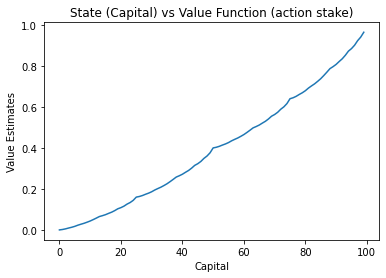

In [93]:
f_plot_valuefunction(V)

### Question 4
In order to see how the value function evolves through each sweep, change the function **value_iteration_for_gamblers** created in question 1, creating the function **value_iteration_for_gamblers_with_sweeps**, that uses the **f_plot_valuefunction** above to plot Value Estimates (action stake) vs State (Capital) for each sweep. 

In [94]:
# function to implement value iteration for the gambler’s problem
def value_iteration_for_gamblers_with_sweeps(p_h, theta=0.0001, discount_factor=1):
    """
    Args:
        p_h: Probability of the coin coming up heads
        theta: termination condition
        discount_factor: discount factor (1 = undiscounted)
    Returns:
        V: A vector containing the expected value of each action. 
        rewards: A vector with the fixed rewards for the problem.
    """
    V = np.zeros(101)
    rewards = np.zeros(101)
    rewards[100] = 1

    iteration = 0
    while True:
        iteration += 1
        delta = 0
        V_copy = V.copy()
        for s in range(101):
            A = one_step_lookahead(p_h, discount_factor, s, V, rewards)
            V[s] = np.max(A)
            # Calculate delta across all states seen so far    
            delta = max(delta, np.abs(V_copy[s] - V[s]))
            
        f_plot_valuefunction(V)

        if delta < theta:
            print("=================== FINAL RESULT ==================")
            print("Iterations: " + str(iteration))
            print("Delta: " + str(delta))
            print("Gamma: " + str(discount_factor))
            print("Theta: " + str(theta))
            print("===================================================")
            break

    
    return V, rewards

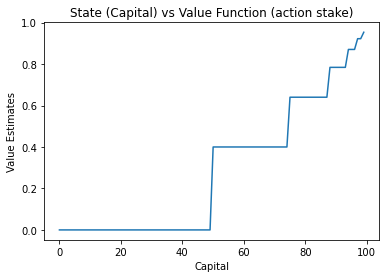

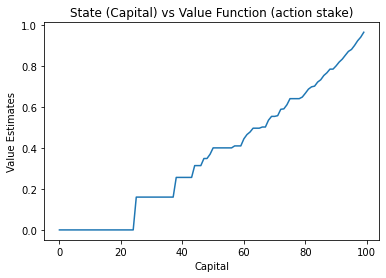

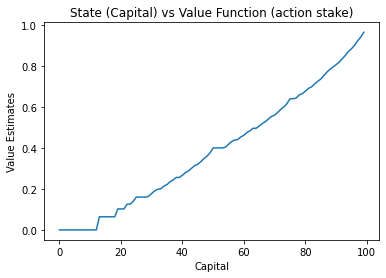

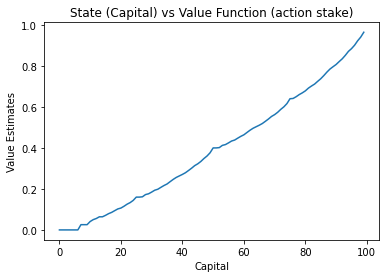

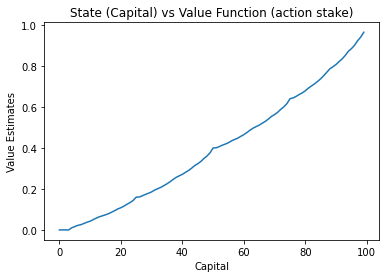

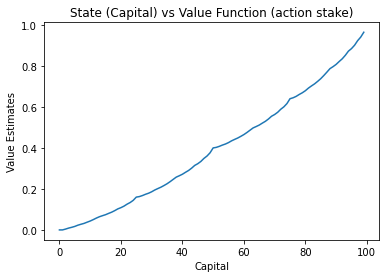

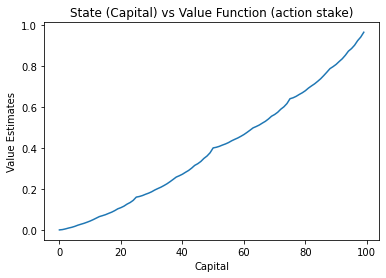

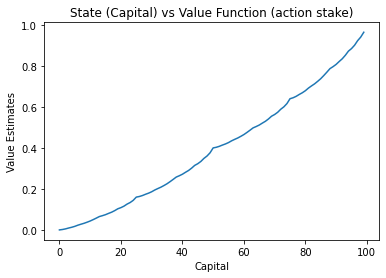

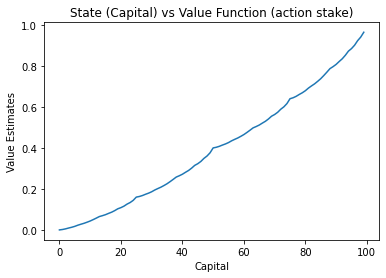

=================== FINAL RESULT ==================
Iterations: 9
Delta: 7.602595430399994e-05
Gamma: 1
Theta: 0.0001
Optimized Policy:
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 12. 11. 10.  9.  8.
  7.  6.  5.  4.  3.  2.  1. 25.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.
 11. 12. 12. 11. 10.  9.  8.  7.  6.  5.  4.  3.  2.  1. 50.  1.  2.  3.
  4.  5.  6.  7.  8.  9. 10. 11. 12. 12. 11. 10.  9.  8.  7.  6.  5.  4.
  3.  2.  1. 25.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 12. 11.
 10.  9.  8.  7.  6.  5.  4.  3.  2.  1.]

Optimized Value Function:
[0.         0.00203162 0.00515507 0.00922512 0.01290418 0.01738208
 0.02306279 0.02781403 0.03227457 0.03767825 0.04346082 0.05035153
 0.05765757 0.06521897 0.06953507 0.07442925 0.08068842 0.08660695
 0.09421092 0.10313138 0.10865755 0.11596417 0.12587883 0.1335785
 0.1441471  0.16       0.16309304 0.16774251 0.17383767 0.17936474
 0.18607649 0.19459454 0.20172104 0.20841305 0.21652655 0.22519453
 0.2355273  0.24648826 0.2578

In [95]:
v, rewards = value_iteration_for_gamblers_with_sweeps(p_h)

print("Optimized Policy:")
print(policy)
print("")

print("Optimized Value Function:")
print(v)
print("")

### Question 5
Create a function to plot Optimal Policy vs State (Capital).

Why does the optimal policy for the gambler’s problem have such a curious
form? 

In particular, for capital of 50 it bets it all on one flip, but for capital of 51 it does
not. Why is this a good policy?

In [96]:
# Plotting Capital vs Final Policy
def f_plot_policy(policy_in):
    """ 
    Args:
        policy: A vector representing best policy for the gambler's problem. 
    """
    x = range(100)
    print("Captital: {}".format(x))
    y = policy_in
    print("Policy: {}".format(y))
    
    plt.bar(x, y, align='center', alpha=0.5, width=1)
    
    plt.xlabel('Captial')
    plt.ylabel("Final stake")
    
    plt.title('Captial vs Final Policy')
    plt.show()
    return

Captital: range(0, 100)
Policy: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 12. 11. 10.  9.  8.
  7.  6.  5.  4.  3.  2.  1. 25.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.
 11. 12. 12. 11. 10.  9.  8.  7.  6.  5.  4.  3.  2.  1. 50.  1.  2.  3.
  4.  5.  6.  7.  8.  9. 10. 11. 12. 12. 11. 10.  9.  8.  7.  6.  5.  4.
  3.  2.  1. 25.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 12. 11.
 10.  9.  8.  7.  6.  5.  4.  3.  2.  1.]


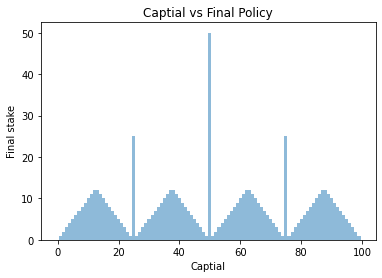

In [97]:
f_plot_policy(policy)

In [79]:
policy[50]

50.0